In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
# Importing the raw data from a csv
data = pd.read_csv("../data/sales_data.csv")

In [4]:
data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [5]:
data.columns


Index(['Opportunity Number', 'Supplies Subgroup', 'Supplies Group', 'Region',
       'Route To Market', 'Elapsed Days In Sales Stage', 'Opportunity Result',
       'Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category'],
      dtype='object')

In [6]:
data['y_hat'] = data['Opportunity Result'].map({'Won':1,'Loss':0})

In [7]:
data.describe(include="all")

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category,y_hat
count,7.802500e+04,78025,78025,78025,78025,78025.000000,78025,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000
unique,NaN,11,4,7,5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Motorcycle Parts,Car Accessories,Midwest,Fields Sales,NaN,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN
freq,NaN,15174,49810,21020,37262,NaN,60398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56724,NaN,NaN,NaN,NaN,NaN
mean,7.653429e+06,NaN,NaN,NaN,NaN,43.595348,NaN,2.955732,16.728356,16.314348,91637.260750,1.620481,1.604050,0.303287,NaN,0.203063,0.488314,0.185048,3.436745,0.225915
std,1.054848e+06,NaN,NaN,NaN,NaN,26.585600,NaN,1.497242,16.729593,16.562597,133161.029157,1.235796,1.210744,0.930290,NaN,0.364985,0.448077,0.340283,1.656890,0.418186
min,1.641984e+06,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.900423e+06,NaN,NaN,NaN,NaN,19.000000,NaN,2.000000,4.000000,4.000000,15000.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.000000,0.000000
50%,7.545569e+06,NaN,NaN,NaN,NaN,43.000000,NaN,3.000000,12.000000,12.000000,49000.000000,1.000000,1.000000,0.000000,NaN,0.000000,0.448000,0.000000,3.000000,0.000000
75%,8.228329e+06,NaN,NaN,NaN,NaN,65.000000,NaN,3.000000,24.000000,24.000000,105099.000000,1.000000,1.000000,0.000000,NaN,0.197225,1.000000,0.188552,5.000000,0.000000


In [8]:
data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
y_hat                          

In [9]:
data.duplicated().sum() # We have some duplicate data points

55

In [10]:
data.duplicated(subset='Opportunity Number').sum() # We'll have to see if these are definately duplicates or is 

196

In [11]:
data[data.duplicated(subset='Opportunity Number')].groupby('Opportunity Result').count()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category,y_hat
Opportunity Result,,,,,,,,,,,,,,,,,,,
Loss,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117,117
Won,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.drop(columns=['Opportunity Number','Supplies Subgroup','Ratio Days Identified To Total Days',
           'Ratio Days Qualified To Total Days','Ratio Days Validated To Total Days',
          'Total Days Identified Through Closing','Total Days Identified Through Qualified'], inplace=True) 
# We wouldn't know any of this information about a lead, so we won't use it for predicting the sale.

In [14]:
data.reset_index(drop=True,inplace=True)

In [15]:
data.head()

,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,y_hat
0,Car Accessories,Northwest,Fields Sales,76,Won,13,0,5,5,0,Unknown,1,1
1,Car Accessories,Pacific,Reseller,63,Loss,2,0,3,5,0,Unknown,1,0
2,Performance & Non-auto,Pacific,Reseller,24,Won,7,7750,1,1,0,Unknown,1,1
3,Performance & Non-auto,Midwest,Reseller,16,Loss,5,0,1,1,0,Known,1,0
4,Car Accessories,Pacific,Reseller,69,Loss,11,69756,1,1,0,Unknown,4,0


In [16]:
route_region = pd.DataFrame(data=[data.groupby(['Route To Market','Region'])['y_hat'].sum()/data.groupby(['Route To Market','Region'])['y_hat'].count(),
                     data.groupby(['Route To Market','Region'])['y_hat'].count(),data.groupby(['Route To Market','Region'])['y_hat'].sum()],
            index=['Coversion Rate','Total Opporuties','Total Wins']).T
route_region

Coversion Rate  Total Opporuties  Total Wins
Route To Market Region                                                    
Fields Sales    Mid-Atlantic        0.165569            3340.0       553.0
                Midwest             0.175240           10089.0      1768.0
                Northeast           0.173308            3739.0       648.0
                Northwest           0.184691            4651.0       859.0
                Pacific             0.219569            6909.0      1517.0
                Southeast           0.198608            4597.0       913.0
                Southwest           0.164405            3905.0       642.0
Other           Mid-Atlantic        0.236364             110.0        26.0
                Midwest             0.211401             421.0        89.0
                Northeast           0.322581              93.0        30.0
                Northwest           0.273063             271.0        74.0
                Pacific             0.156517            1757.0       275.0
                Southeast           0.153153             111.0        17.0
                Southwest           0.188889              90.0        17.0
Reseller        Mid-Atlantic        0.266248            3985.0      1061.0
                Midwest             0.334763            9792.0      3278.0
                Northeast           0.256026            3402.0       871.0
                Northwest           0.250829            4525.0      1135.0
                Pacific             0.272263            5087.0      1385.0
                Southeast           0.241889            4192.0      1014.0
                Southwest           0.222104            3755.0       834.0
Telecoverage    Mid-Atlantic        0.500000               6.0         3.0
                Midwest             0.117647             102.0        12.0
                Northeast           0.031250              32.0         1.0
                Northwest           0.019608              51.0         1.0
                Pacific             0.062069             290.0        18.0
                Southeast           0.032787             122.0         4.0
                Southwest           0.062500              16.0         1.0
Telesales       Mid-Atlantic        0.064000             125.0         8.0
                Midwest             0.300493             609.0       183.0
                Northeast           0.155556              90.0        14.0
                Northwest           0.100000              50.0         5.0
                Pacific             0.215814            1075.0       232.0
                Southeast           0.338308             201.0        68.0
                Southwest           0.115789             380.0        44.0

In [17]:
region_to_route = pd.DataFrame(data=[data.groupby(['Region','Route To Market'])['y_hat'].sum()/data.groupby(['Region','Route To Market'])['y_hat'].count(),
                     data.groupby(['Region','Route To Market'])['y_hat'].count(),data.groupby(['Region','Route To Market'])['y_hat'].sum()],
            index=['Coversion Rate','Total Opporuties','Total Wins']).T
region_to_route

Coversion Rate  Total Opporuties  Total Wins
Region       Route To Market                                              
Mid-Atlantic Fields Sales           0.165569            3340.0       553.0
             Other                  0.236364             110.0        26.0
             Reseller               0.266248            3985.0      1061.0
             Telecoverage           0.500000               6.0         3.0
             Telesales              0.064000             125.0         8.0
Midwest      Fields Sales           0.175240           10089.0      1768.0
             Other                  0.211401             421.0        89.0
             Reseller               0.334763            9792.0      3278.0
             Telecoverage           0.117647             102.0        12.0
             Telesales              0.300493             609.0       183.0
Northeast    Fields Sales           0.173308            3739.0       648.0
             Other                  0.322581              93.0        30.0
             Reseller               0.256026            3402.0       871.0
             Telecoverage           0.031250              32.0         1.0
             Telesales              0.155556              90.0        14.0
Northwest    Fields Sales           0.184691            4651.0       859.0
             Other                  0.273063             271.0        74.0
             Reseller               0.250829            4525.0      1135.0
             Telecoverage           0.019608              51.0         1.0
             Telesales              0.100000              50.0         5.0
Pacific      Fields Sales           0.219569            6909.0      1517.0
             Other                  0.156517            1757.0       275.0
             Reseller               0.272263            5087.0      1385.0
             Telecoverage           0.062069             290.0        18.0
             Telesales              0.215814            1075.0       232.0
Southeast    Fields Sales           0.198608            4597.0       913.0
             Other                  0.153153             111.0        17.0
             Reseller               0.241889            4192.0      1014.0
             Telecoverage           0.032787             122.0         4.0
             Telesales              0.338308             201.0        68.0
Southwest    Fields Sales           0.164405            3905.0       642.0
             Other                  0.188889              90.0        17.0
             Reseller               0.222104            3755.0       834.0
             Telecoverage           0.062500              16.0         1.0
             Telesales              0.115789             380.0        44.0

In [18]:
sheet_3 =pd.DataFrame(
    data=[data.groupby(['Client Size By Revenue',
                        'Deal Size Category',
                       'Route To Market'])['y_hat'].sum()/data.groupby(['Client Size By Revenue',
                                                                    'Deal Size Category',
                                                                       'Route To Market'])['y_hat'].count(),
          
          data.groupby(['Client Size By Revenue','Deal Size Category','Route To Market'])['y_hat'].count(),
          data.groupby(['Client Size By Revenue','Deal Size Category','Route To Market'])['y_hat'].sum()],
            index=['Coversion Rate','Total Opporuties','Total Wins']).T
sheet_3

Coversion Rate  \
Client Size By Revenue Deal Size Category Route To Market                   
1                      1                  Fields Sales           0.425705   
                                          Other                  0.290859   
                                          Reseller               0.395707   
                                          Telecoverage           0.065934   
                                          Telesales              0.427536   
...                                                                   ...   
5                      6                  Reseller               0.437500   
                                          Telesales              0.000000   
                       7                  Fields Sales           0.228571   
                                          Other                  0.200000   
                                          Reseller               0.500000   

                                                           Total Opporuties  \
Client Size By Revenue Deal Size Category Route To Market                     
1                      1                  Fields Sales               3688.0   
                                          Other                       361.0   
                                          Reseller                   4799.0   
                                          Telecoverage                 91.0   
                                          Telesales                   690.0   
...                                                                     ...   
5                      6                  Reseller                     48.0   
                                          Telesales                     6.0   
                       7                  Fields Sales                210.0   
                                          Other                        30.0   
                                          Reseller                     28.0   

                                                           Total Wins  
Client Size By Revenue Deal Size Category Route To Market              
1                      1                  Fields Sales         1570.0  
                                          Other                 105.0  
                                          Reseller             1899.0  
                                          Telecoverage            6.0  
                                          Telesales             295.0  
...                                                               ...  
5                      6                  Reseller               21.0  
                                          Telesales               0.0  
                       7                  Fields Sales           48.0  
                                          Other                   6.0  
                                          Reseller               14.0  

[163 rows x 3 columns]

In [19]:
my_data = {'Regional Sales by Type':route_region,'Sale Type by Region':region_to_route, "Size by Category-route": sheet_3}

In [20]:
sheet_4 = pd.DataFrame(
    data=[data.groupby(['Client Size By Revenue',
                        'Deal Size Category',
                       'Route To Market',
                       'Supplies Group'])['y_hat'].sum()/data.groupby(['Client Size By Revenue',
                                                                    'Deal Size Category',
                                                                       'Route To Market',
                                                                      'Supplies Group'])['y_hat'].count(),
          
          data.groupby(['Client Size By Revenue','Deal Size Category','Route To Market',
                       'Supplies Group'])['y_hat'].count(),
          data.groupby(['Client Size By Revenue','Deal Size Category','Route To Market',
                       'Supplies Group'])['y_hat'].sum()],
            index=['Coversion Rate','Total Opporuties','Total Wins']).T
sheet_4

Coversion Rate  \
Client Size By Revenue Deal Size Category Route To Market Supplies Group                           
1                      1                  Fields Sales    Car Accessories               0.366511   
                                                          Car Electronics               0.268293   
                                                          Performance & Non-auto        0.498534   
                                                          Tires & Wheels                0.153846   
                                          Other           Car Accessories               0.292035   
...                                                                                          ...   
5                      7                  Other           Car Electronics               0.000000   
                                                          Performance & Non-auto        0.100000   
                                                          Tires & Wheels                0.000000   
                                          Reseller        Car Accessories               0.588235   
                                                          Performance & Non-auto        0.363636   

                                                                                  Total Opporuties  \
Client Size By Revenue Deal Size Category Route To Market Supplies Group                             
1                      1                  Fields Sales    Car Accessories                   1929.0   
                                                          Car Electronics                     41.0   
                                                          Performance & Non-auto            1705.0   
                                                          Tires & Wheels                      13.0   
                                          Other           Car Accessories                    226.0   
...                                                                                            ...   
5                      7                  Other           Car Electronics                      1.0   
                                                          Performance & Non-auto              10.0   
                                                          Tires & Wheels                       1.0   
                                          Reseller        Car Accessories                     17.0   
                                                          Performance & Non-auto              11.0   

                                                                                  Total Wins  
Client Size By Revenue Deal Size Category Route To Market Supplies Group                      
1                      1                  Fields Sales    Car Accessories              707.0  
                                                          Car Electronics               11.0  
                                                          Performance & Non-auto       850.0  
                                                          Tires & Wheels                 2.0  
                                          Other           Car Accessories               66.0  
...                                                                                      ...  
5                      7                  Other           Car Electronics                0.0  
                                                          Performance & Non-auto         1.0  
                                                          Tires & Wheels                 0.0  
                                          Reseller        Car Accessories               10.0  
                                                          Performance & Non-auto         4.0  

[427 rows x 3 columns]

In [21]:
my_data['Granular Sales Report'] = sheet_4

In [22]:
data.head()

,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,y_hat
0,Car Accessories,Northwest,Fields Sales,76,Won,13,0,5,5,0,Unknown,1,1
1,Car Accessories,Pacific,Reseller,63,Loss,2,0,3,5,0,Unknown,1,0
2,Performance & Non-auto,Pacific,Reseller,24,Won,7,7750,1,1,0,Unknown,1,1
3,Performance & Non-auto,Midwest,Reseller,16,Loss,5,0,1,1,0,Known,1,0
4,Car Accessories,Pacific,Reseller,69,Loss,11,69756,1,1,0,Unknown,4,0


In [23]:
data.drop(columns='Opportunity Result', axis=1, inplace=True)

In [24]:
dummied_data = pd.get_dummies(data, columns=['Supplies Group','Region','Route To Market','Competitor Type'],
               prefix=['Category','Region','POS','Competitor'],
              drop_first=True)

In [25]:
dummied_data.head()

,Elapsed Days In Sales Stage,Sales Stage Change Count,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,y_hat,Category_Car Electronics,Category_Performance & Non-auto,...,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,POS_Other,POS_Reseller,POS_Telecoverage,POS_Telesales,Competitor_None,Competitor_Unknown
0,76,13,0,5,5,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,63,2,0,3,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,24,7,7750,1,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,16,5,0,1,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,69,11,69756,1,1,0,4,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [26]:
# Resellers have a higher conversion rate than field sales reps 

sheet_5 = pd.DataFrame([dummied_data.groupby(['Elapsed Days In Sales Stage',
            'Deal Size Category'])['y_hat'].sum()/dummied_data.groupby(['Elapsed Days In Sales Stage',
                                                                        'Deal Size Category'])['y_hat'].count(),
            dummied_data.groupby(['Elapsed Days In Sales Stage',
            'Deal Size Category'])['y_hat'].sum()]).T.tail(500)


In [27]:
my_data['Deals By Elapsed Days'] = sheet_5  # Added this new sheet to the dictionary

In [28]:
dummied_data.head()

,Elapsed Days In Sales Stage,Sales Stage Change Count,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category,y_hat,Category_Car Electronics,Category_Performance & Non-auto,...,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,POS_Other,POS_Reseller,POS_Telecoverage,POS_Telesales,Competitor_None,Competitor_Unknown
0,76,13,0,5,5,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,63,2,0,3,5,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,24,7,7750,1,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,16,5,0,1,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,69,11,69756,1,1,0,4,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
dummied_data.drop(columns=['Elapsed Days In Sales Stage','Sales Stage Change Count'],axis=1,inplace=True)

In [30]:
data_2 = pd.get_dummies(data=dummied_data, columns=['Client Size By Revenue',
                                           'Client Size By Employee Count',
                                          'Revenue From Client Past Two Years',
                                          'Deal Size Category'],
               drop_first=True)

In [31]:
test= [800_000,700_000,600_000,500_000,400_000,300_000,250_000,200_000,150_000,100_000,50_000,25_000,10_000,5_000,1_000]
for i in test:
    data_2[f'Opportunity Amount > {i}'] = data_2['Opportunity Amount USD'].map(lambda x: 1 if x> i else 0)

In [32]:
data_2.drop(columns='Opportunity Amount USD', axis=1, inplace=True)

In [33]:
data_2.head()

,y_hat,Category_Car Electronics,Category_Performance & Non-auto,Category_Tires & Wheels,Region_Midwest,Region_Northeast,Region_Northwest,Region_Pacific,Region_Southeast,Region_Southwest,...,Opportunity Amount > 300000,Opportunity Amount > 250000,Opportunity Amount > 200000,Opportunity Amount > 150000,Opportunity Amount > 100000,Opportunity Amount > 50000,Opportunity Amount > 25000,Opportunity Amount > 10000,Opportunity Amount > 5000,Opportunity Amount > 1000
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,1


In [34]:
data_2.to_csv('../data/clean_data.csv')

In [35]:
writer = pd.ExcelWriter('../data/stats.xlsx', engine='xlsxwriter')

for file_name in list(my_data.keys()):
    my_data[file_name].to_excel(writer,sheet_name=file_name,index=True)
writer.save()

# Machine Learning

**We are going to fit a Logistic regression model to this data and interpret their coeficiets to determine <br>
which features most accurately predict sales.**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc

In [37]:
lr = LogisticRegression(C=1_000,n_jobs=-2,solver='lbfgs')

In [38]:
X = data_2.drop('y_hat', axis=1)

In [39]:
y = data_2['y_hat']

In [40]:
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state=42,
                                                 test_size=.25)

In [41]:
lr.fit(X_train,y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-2, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr.score(X_train,y_train)

0.8132770148947449

In [43]:
lr.score(X_test,y_test) # similar train and test results indicate that the model is not overfit.

0.8136767044580105

In [44]:
cross_val_score(lr,X,y, cv =5)

array([0.794857  , 0.82294472, 0.82179043, 0.80396306, 0.82249583])

In [45]:
lr.coef_

array([[ 4.56906241e-01,  1.42400286e-02, -2.58403077e-01,
         1.59962614e-01,  5.70330337e-02, -1.10199100e-01,
         9.02149646e-02,  2.24935449e-02, -2.94615809e-02,
        -5.85631980e-02,  3.54438194e-01, -1.33251205e+00,
         4.95991676e-03,  3.93007022e-01, -1.18363832e-01,
        -2.30936730e-02,  3.73948873e-02,  1.03005114e-01,
        -9.42852346e-02, -4.91231550e-02,  4.10482545e-02,
         2.55338960e-02, -5.81822660e-02,  2.91675670e+00,
         2.72374531e+00,  2.32401002e+00,  1.75188921e+00,
        -1.70705776e+00, -2.75033073e+00, -4.47061210e+00,
        -6.33813520e+00, -8.24708098e+00, -1.03949529e+01,
        -4.23748975e-02, -1.29429172e-01, -1.52139533e-01,
         2.20846289e+00,  6.72564697e-01,  3.56229920e-02,
         1.16640334e+00,  9.47309574e-01,  1.98987149e-01,
         1.03031597e+00,  1.56904274e+00,  8.33473099e-01,
         9.51443702e-01,  1.82260640e-01,  5.05868396e-01]])

In [46]:
X.columns[1]

'Category_Performance & Non-auto'

In [47]:
coeficient = {X.columns[i]:[lr.coef_[0][i]] for i in range(len(X.columns))} 

In [48]:
coeficient = pd.DataFrame(coeficient, index=['Coeficient']).T.sort_values('Coeficient')

In [49]:
coeficient.sort_values(['Coeficient'],ascending=False)

,Coeficient
Revenue From Client Past Two Years_1,2.916757
Revenue From Client Past Two Years_2,2.723745
Revenue From Client Past Two Years_3,2.324010
Opportunity Amount > 500000,2.208463
Revenue From Client Past Two Years_4,1.751889
Opportunity Amount > 50000,1.569043
Opportunity Amount > 250000,1.166403
Opportunity Amount > 100000,1.030316
Opportunity Amount > 10000,0.951444
Opportunity Amount > 200000,0.947310


In [50]:
my_data['Coeficients'] = coeficient

In [51]:
writer = pd.ExcelWriter('../data/stats.xlsx', engine='xlsxwriter')

for file_name in list(my_data.keys()):
    my_data[file_name].to_excel(writer,sheet_name=file_name,index=True)
writer.save()

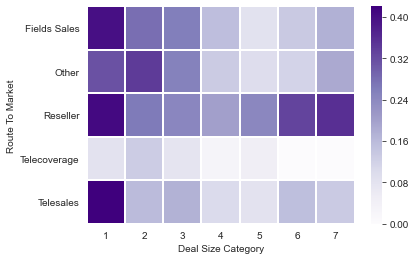

In [52]:
pivot_table = data.pivot_table(values='y_hat',index='Route To Market',columns='Deal Size Category')
sns.heatmap(pivot_table,cmap='Purples',linecolor='white',linewidths=1)

In [53]:
data.head()

,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Deal Size Category,y_hat
0,Car Accessories,Northwest,Fields Sales,76,13,0,5,5,0,Unknown,1,1
1,Car Accessories,Pacific,Reseller,63,2,0,3,5,0,Unknown,1,0
2,Performance & Non-auto,Pacific,Reseller,24,7,7750,1,1,0,Unknown,1,1
3,Performance & Non-auto,Midwest,Reseller,16,5,0,1,1,0,Known,1,0
4,Car Accessories,Pacific,Reseller,69,11,69756,1,1,0,Unknown,4,0


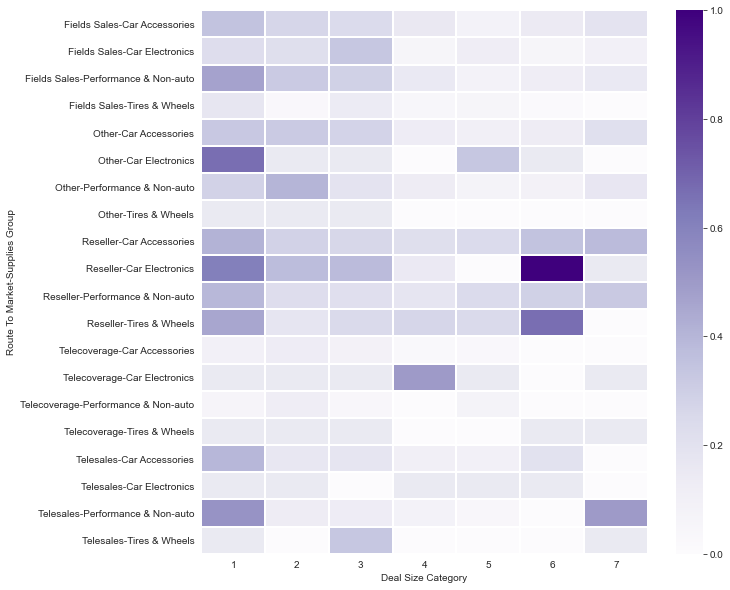

In [54]:
pivot_table = data.pivot_table(values='y_hat',index=['Route To Market','Supplies Group'],columns='Deal Size Category')
plt.figure(figsize=(10,10))
sns.heatmap(pivot_table,cmap='Purples',linecolor='white',linewidths=1)


In [55]:
data['Deal Size Category'].unique()

array([1, 4, 5, 2, 6, 7, 3], dtype=int64)

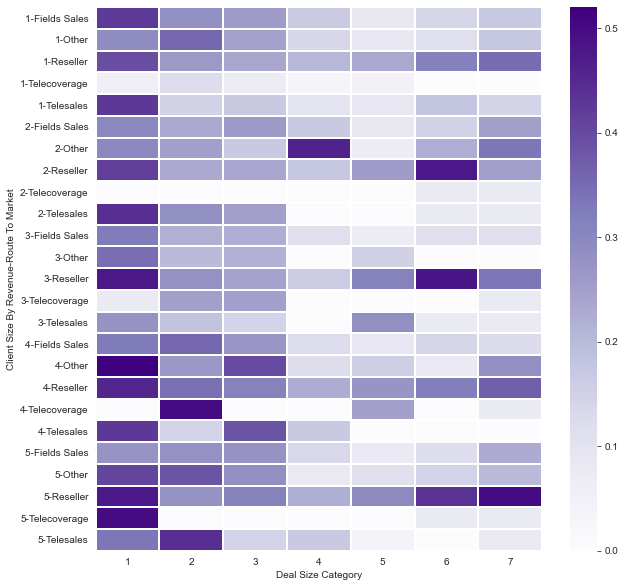

In [56]:
pivot_table = data.pivot_table(values='y_hat',index=['Client Size By Revenue',
                                                     'Route To Market']
                               ,columns='Deal Size Category')
plt.figure(figsize=(10,10))
sns.heatmap(pivot_table,cmap='Purples',linecolor='white',linewidths=1);


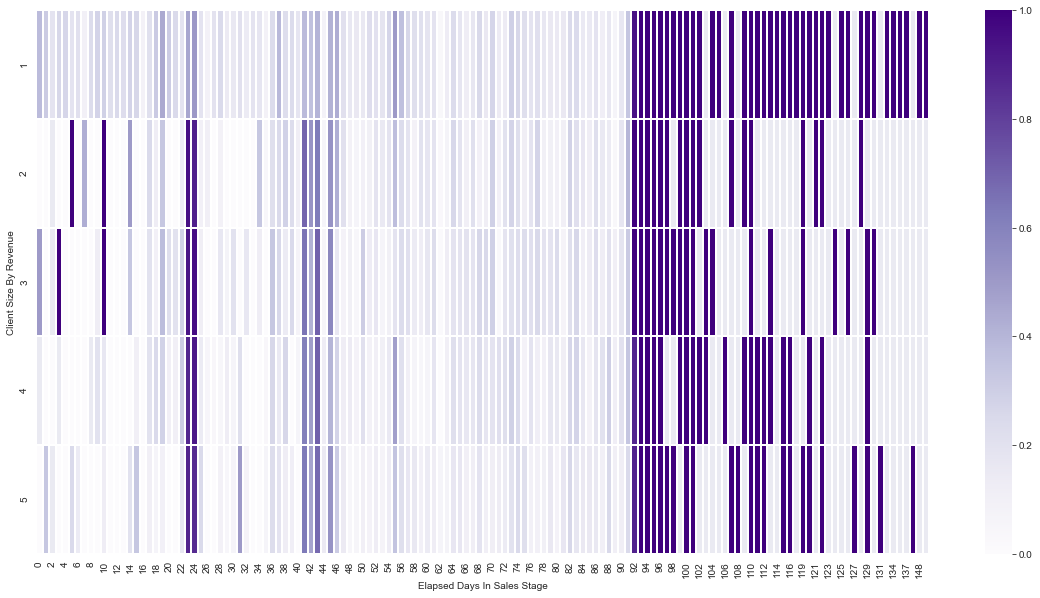

In [57]:
pivot_table = data.pivot_table(values='y_hat',index=['Client Size By Revenue',
                                                     ]
                               ,columns=['Elapsed Days In Sales Stage'],
                              aggfunc='mean')
plt.figure(figsize=(20,10))
sns.heatmap(pivot_table,cmap='Purples',linecolor='white',linewidths=1);

In [58]:
my_data.keys()

dict_keys(['Regional Sales by Type', 'Sale Type by Region', 'Size by Category-route', 'Granular Sales Report', 'Deals By Elapsed Days', 'Coeficients'])

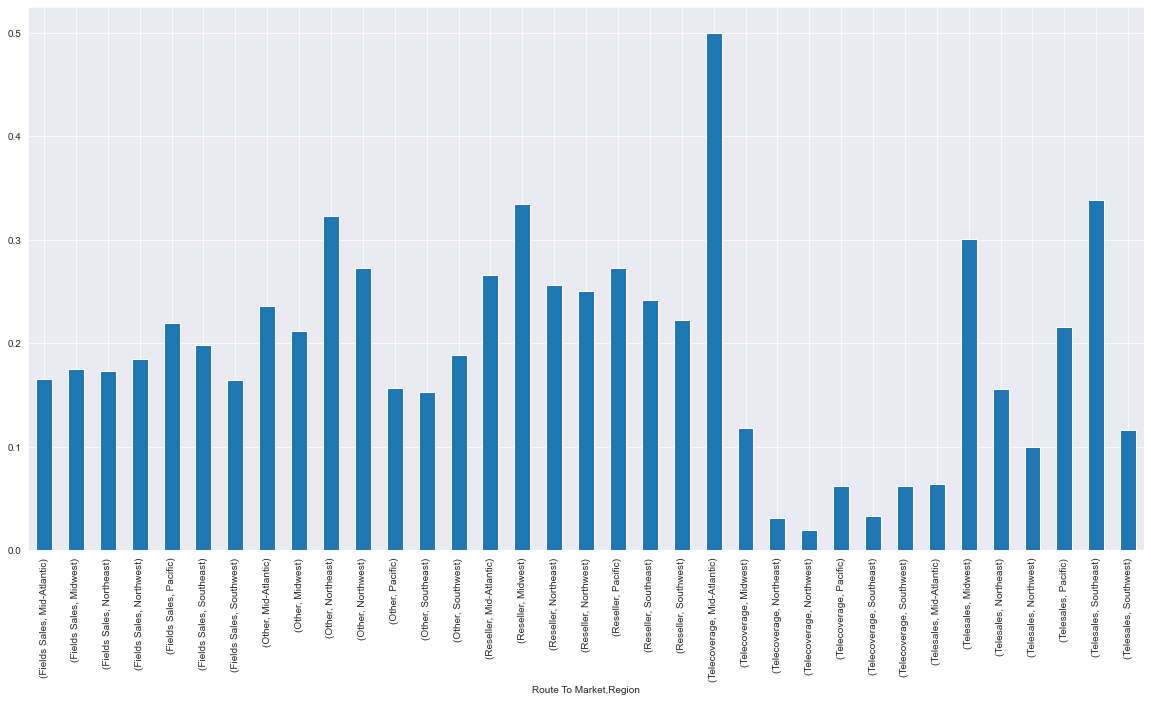

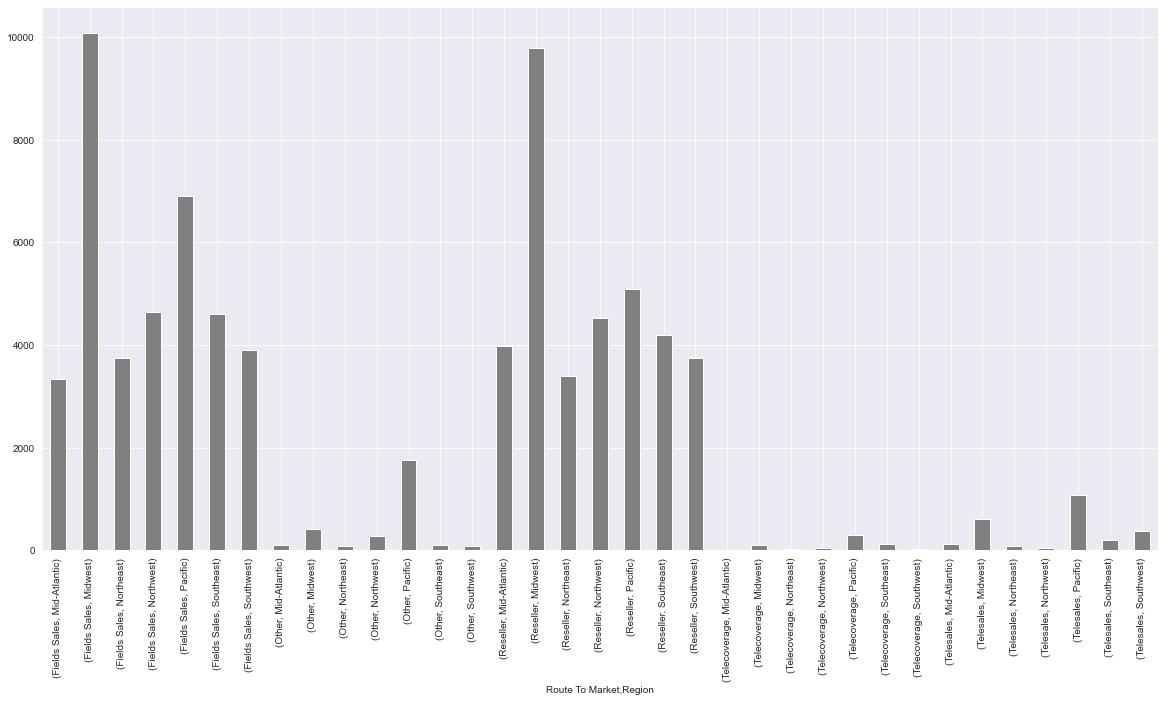

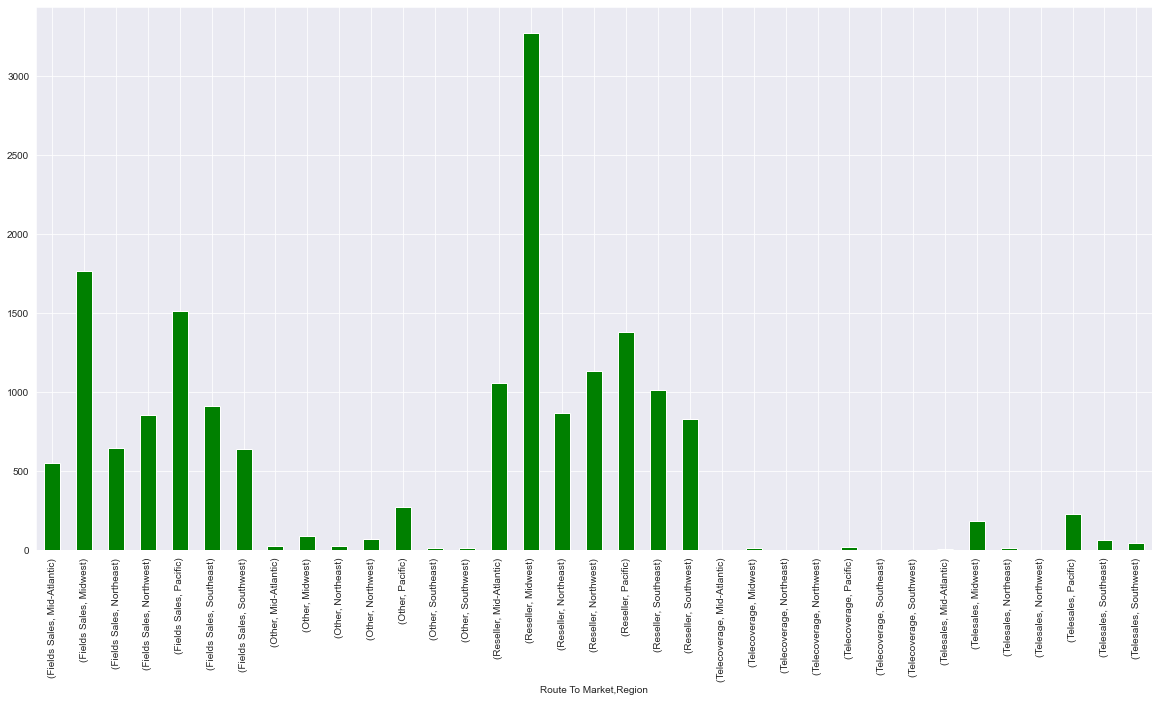

In [59]:
plt.figure(figsize=(20,10))
my_data['Regional Sales by Type']['Coversion Rate'].plot.bar()
plt.figure(figsize=(20,10))
my_data['Regional Sales by Type']['Total Opporuties'].plot.bar(color='gray')
plt.figure(figsize=(20,10))
my_data['Regional Sales by Type']['Total Wins'].plot.bar(color='green')

In [60]:
my_data['Regional Sales by Type']

Coversion Rate  Total Opporuties  Total Wins
Route To Market Region                                                    
Fields Sales    Mid-Atlantic        0.165569            3340.0       553.0
                Midwest             0.175240           10089.0      1768.0
                Northeast           0.173308            3739.0       648.0
                Northwest           0.184691            4651.0       859.0
                Pacific             0.219569            6909.0      1517.0
                Southeast           0.198608            4597.0       913.0
                Southwest           0.164405            3905.0       642.0
Other           Mid-Atlantic        0.236364             110.0        26.0
                Midwest             0.211401             421.0        89.0
                Northeast           0.322581              93.0        30.0
                Northwest           0.273063             271.0        74.0
                Pacific             0.156517            1757.0       275.0
                Southeast           0.153153             111.0        17.0
                Southwest           0.188889              90.0        17.0
Reseller        Mid-Atlantic        0.266248            3985.0      1061.0
                Midwest             0.334763            9792.0      3278.0
                Northeast           0.256026            3402.0       871.0
                Northwest           0.250829            4525.0      1135.0
                Pacific             0.272263            5087.0      1385.0
                Southeast           0.241889            4192.0      1014.0
                Southwest           0.222104            3755.0       834.0
Telecoverage    Mid-Atlantic        0.500000               6.0         3.0
                Midwest             0.117647             102.0        12.0
                Northeast           0.031250              32.0         1.0
                Northwest           0.019608              51.0         1.0
                Pacific             0.062069             290.0        18.0
                Southeast           0.032787             122.0         4.0
                Southwest           0.062500              16.0         1.0
Telesales       Mid-Atlantic        0.064000             125.0         8.0
                Midwest             0.300493             609.0       183.0
                Northeast           0.155556              90.0        14.0
                Northwest           0.100000              50.0         5.0
                Pacific             0.215814            1075.0       232.0
                Southeast           0.338308             201.0        68.0
                Southwest           0.115789             380.0        44.0

0.34